<a href="https://colab.research.google.com/github/Parul1015/python-mini-projects/blob/master/HR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

    Every year, Employees have promoted in the Several companies. Here we work on random dataset of a company.so we have the check employee is promoted or not?

# Getting Start..

 1. Import packeages/Dataset

 **Import Peckages**

In [1]:
# main libraries       
import numpy as np        # linear algebra
import pandas as pd       # data processing, CSV file I/O (e.g. pd.read_csv)

        

# data visualization Libararies
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 

#ML Libararies:
from sklearn.model_selection    import train_test_split
from sklearn.linear_model       import LinearRegression
from sklearn.linear_model       import LogisticRegression
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.tree               import DecisionTreeClassifier
from sklearn.ensemble           import RandomForestClassifier
from sklearn.naive_bayes        import GaussianNB
from sklearn.linear_model       import SGDClassifier
from lightgbm                   import LGBMClassifier
from sklearn.metrics            import confusion_matrix,accuracy_score

Import Dataset

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#Look at head of dataset
print("Train Head:\n", train.head())

print("\nTest Head:\n " ,test.head())

Train Head:
    employee_id         department  ... avg_training_score is_promoted
0        65438  Sales & Marketing  ...                 49           0
1        65141         Operations  ...                 60           0
2         7513  Sales & Marketing  ...                 50           0
3         2542  Sales & Marketing  ...                 50           0
4        48945         Technology  ...                 73           0

[5 rows x 14 columns]

Test Head:
     employee_id         department  ... awards_won? avg_training_score
0         8724         Technology  ...           0                 77
1        74430                 HR  ...           0                 51
2        72255  Sales & Marketing  ...           0                 47
3        38562        Procurement  ...           0                 65
4        64486            Finance  ...           0                 61

[5 rows x 13 columns]


# 2.Perform Exploratory Data Analysis (EDA): Undersatanding dataset

In [4]:
# check shape of Train & Test data
print('Train Shape:',train.shape)
print('Test Shape:',test.shape)

Train Shape: (54808, 14)
Test Shape: (23490, 13)


In [5]:
#Dispaly information of Train data
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
#Dispaly information of Test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
#Display Discriptive Statistics of Train data
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
#Display Discriptive Statistics of Test data
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


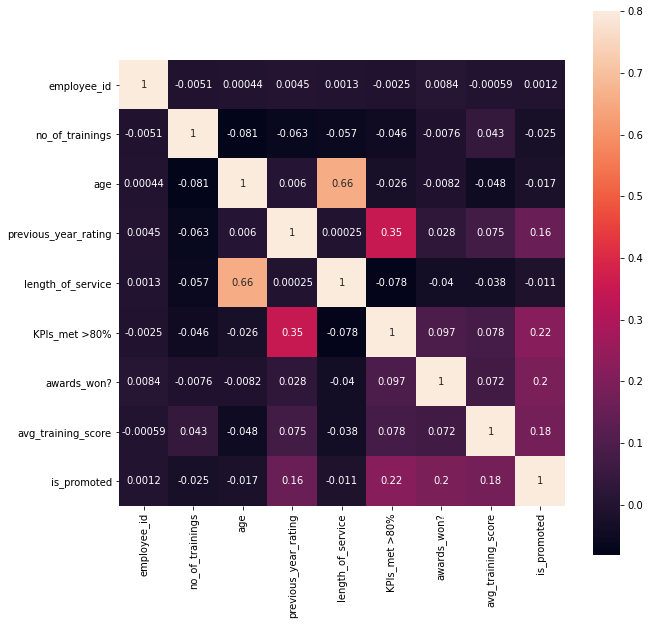

In [9]:
#dispaly Correaltion between features through Heatmap : Lighter color Higher correlation (close to 1)
corr=train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=0.8,square=True,annot=True)

In [10]:
#most corelated feature
n=14
col=corr.nlargest(n,'is_promoted')['is_promoted'].index
most_corr = pd.DataFrame(col)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,is_promoted
1,KPIs_met >80%
2,awards_won?
3,avg_training_score
4,previous_year_rating
5,employee_id
6,length_of_service
7,age
8,no_of_trainings


* #  Univariate Analysis

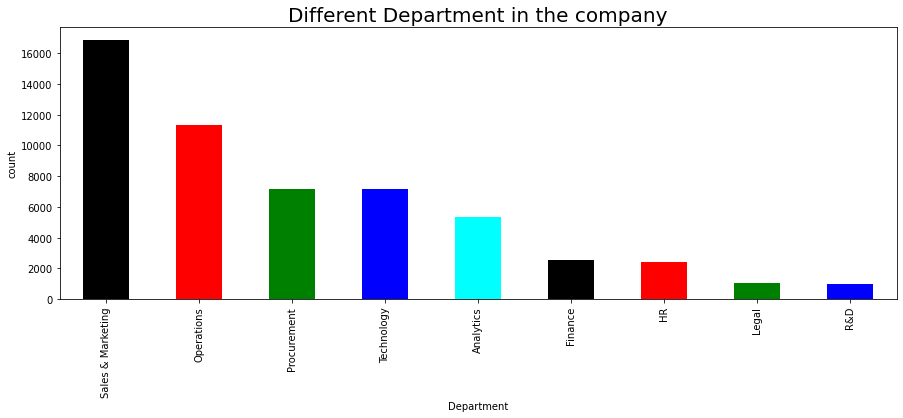

In [11]:
#visualize deaprtment in the company
plt.subplots(figsize=(15,5))
plt.title('Different Department in the company', fontsize = 20)
plt.xlabel('Department')
plt.ylabel('count')
train['department'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


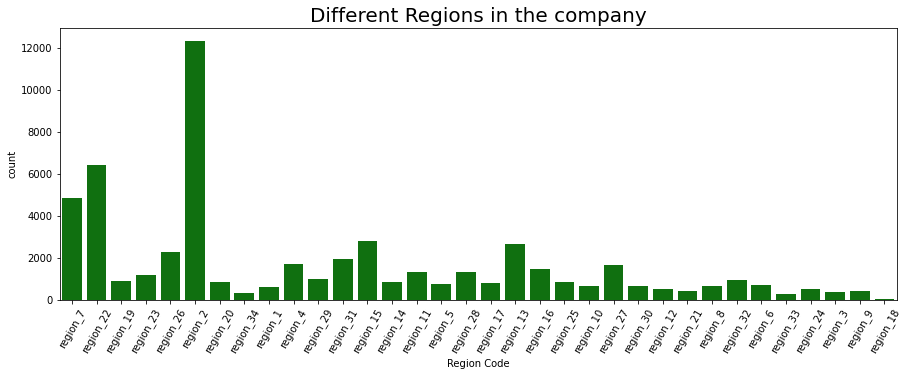

In [12]:
# checking the different regions of the company
plt.subplots(figsize=(15,5))
sns.countplot(train['region'], color = 'green')
plt.title('Different Regions in the company', fontsize = 20)
plt.xticks(rotation = 60)
plt.xlabel('Region Code')
plt.ylabel('count')
plt.show()

In [13]:
#Display no of unique value with categories
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

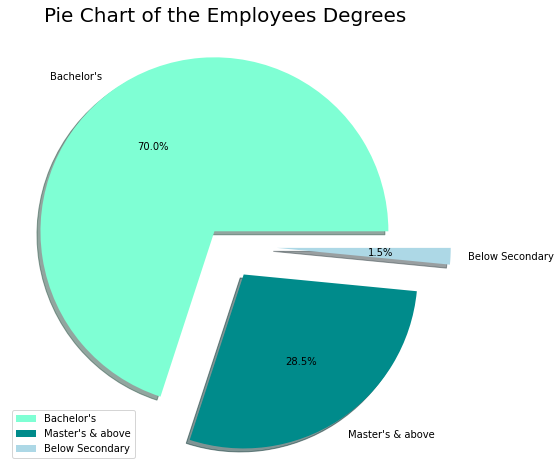

In [14]:
size = [36669,14925,805]
label=["Bachelor's","Master's & above",'Below Secondary']
color=['aquamarine','darkcyan','lightblue']
explode = [0.1, 0.2 , 0.3]

plt.subplots(figsize=(8,8))
plt.pie(size, labels = label, colors = color, explode = explode, shadow = True, autopct = "%.1f%%")
plt.title("Pie Chart of the Employees Degrees", fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [15]:
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

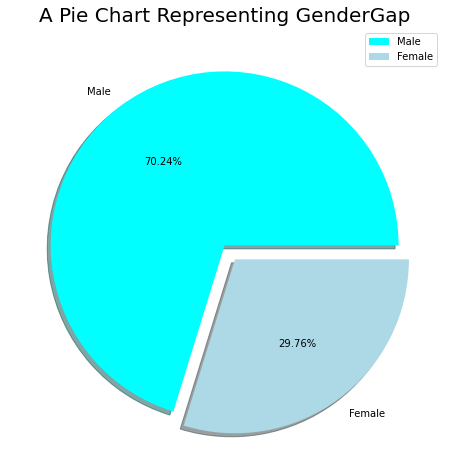

In [16]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ["cyan", "lightblue"]
explode = [0, 0.1]

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

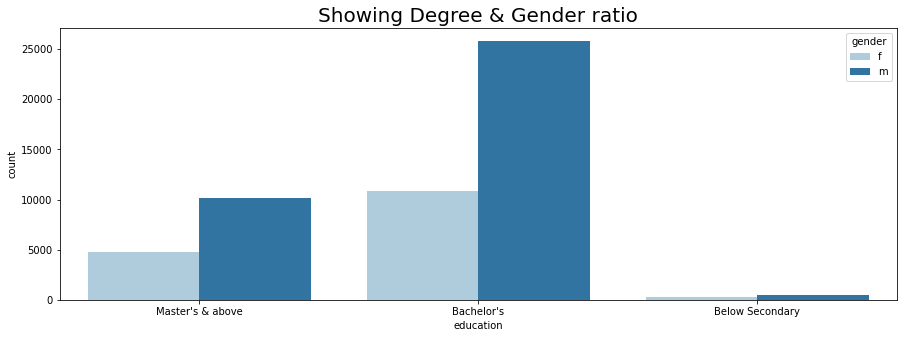

In [17]:
plt.subplots(figsize=(15,5))
sns.countplot(x = 'education', data = train, hue = 'gender', palette = 'Paired')
plt.title('Showing Degree & Gender ratio', fontsize = 20)
plt.show()

In [18]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

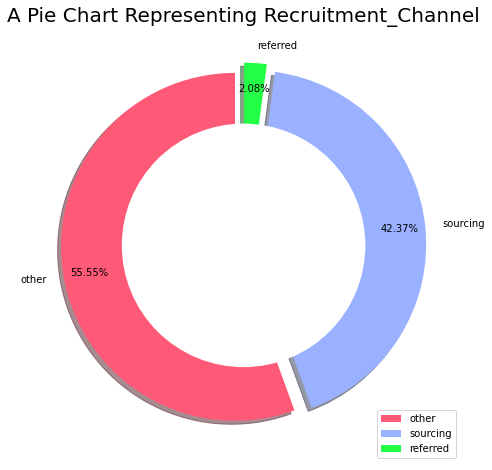

In [19]:
size = [30446, 23220,1142]
labels = "other", "sourcing",'referred'
colors = ['#ff5978','#99b1ff','#22ff44']
explode = [0.05,0.05,0.05]

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, startangle=90, pctdistance=0.85, shadow = True, autopct = "%.2f%%")

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('A Pie Chart Representing Recruitment_Channel', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [20]:
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

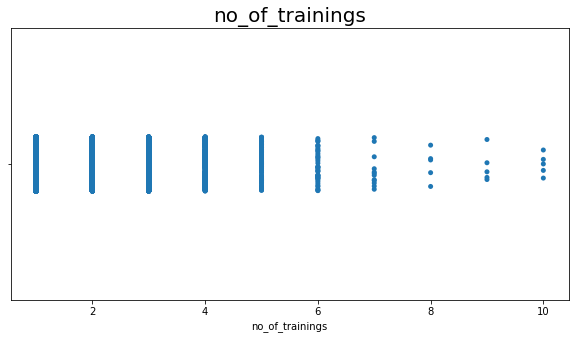

In [21]:
# checking the 
plt.subplots(figsize=(10,5))
sns.stripplot(x=train['no_of_trainings'])
plt.title('no_of_trainings', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


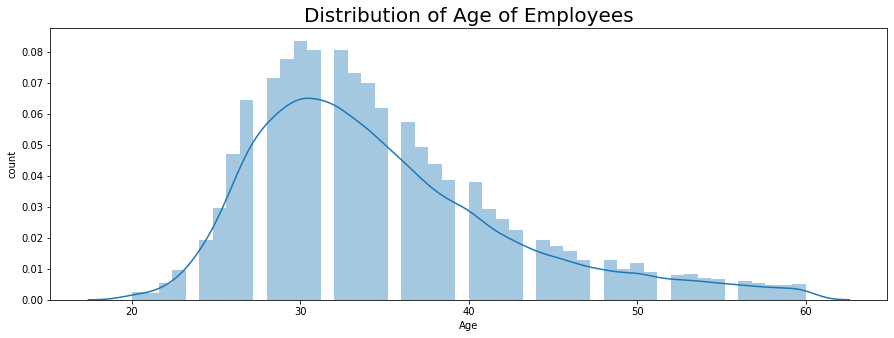

In [22]:
plt.subplots(figsize=(15,5))
sns.distplot(train['age'])
plt.title('Distribution of Age of Employees', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

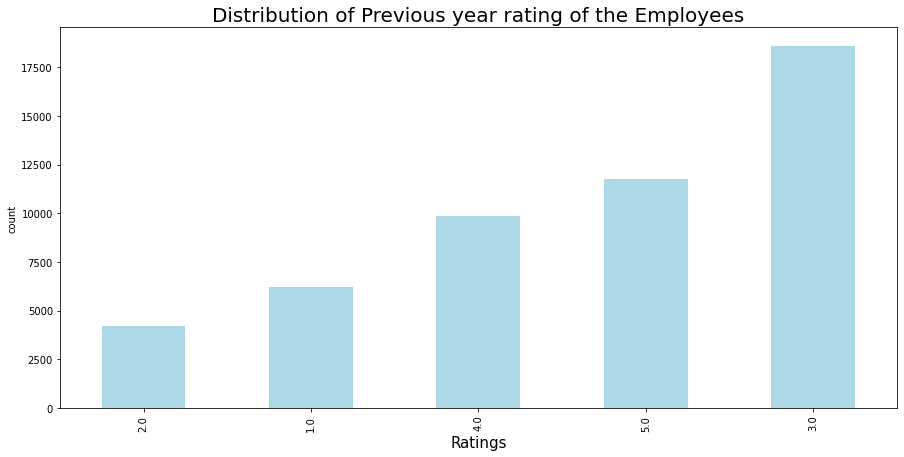

In [23]:
train['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'lightblue', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 20)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


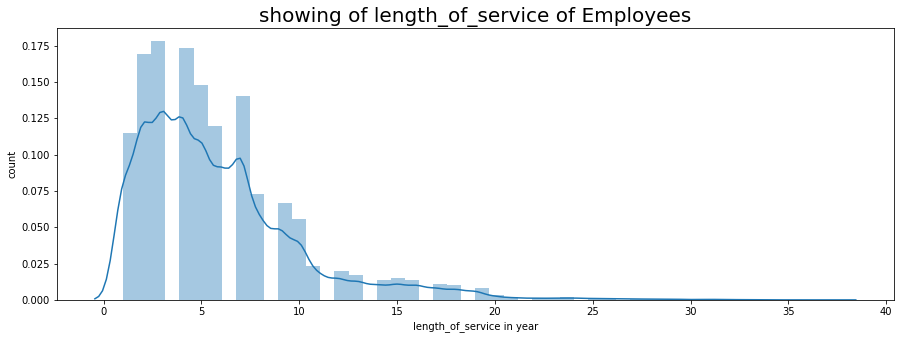

In [24]:
plt.subplots(figsize=(15,5))
sns.distplot(train['length_of_service'])
plt.title('showing of length_of_service of Employees', fontsize = 20)
plt.xlabel('length_of_service in year')
plt.ylabel('count')
plt.show()

In [25]:
train['KPIs_met >80%'].value_counts()


0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

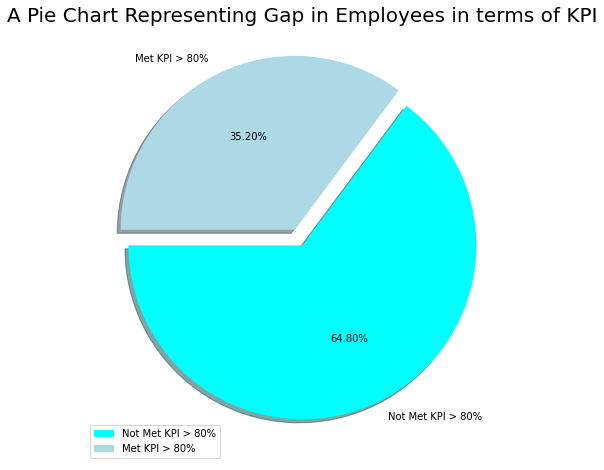

In [26]:
size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ["cyan", "lightblue"]
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%",startangle=180)
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [27]:
train['awards_won?'].value_counts()


0    53538
1     1270
Name: awards_won?, dtype: int64

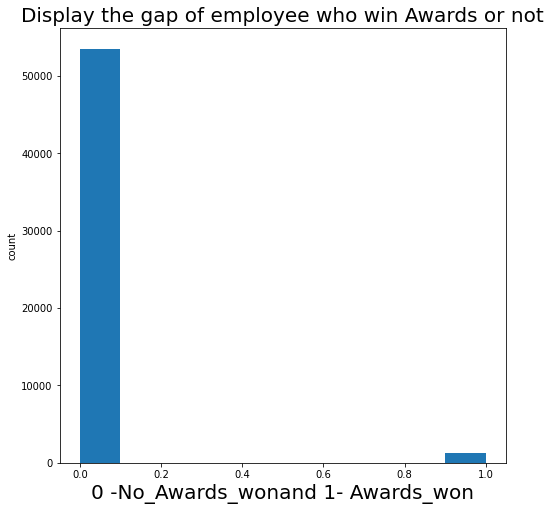

In [28]:
plt.hist(train['awards_won?'])
plt.title('Display the gap of employee who win Awards or not', fontsize = 20)
plt.xlabel('0 -No_Awards_wonand 1- Awards_won', fontsize = 20)
plt.ylabel('count')
plt.show()

In [29]:
train['avg_training_score'].value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


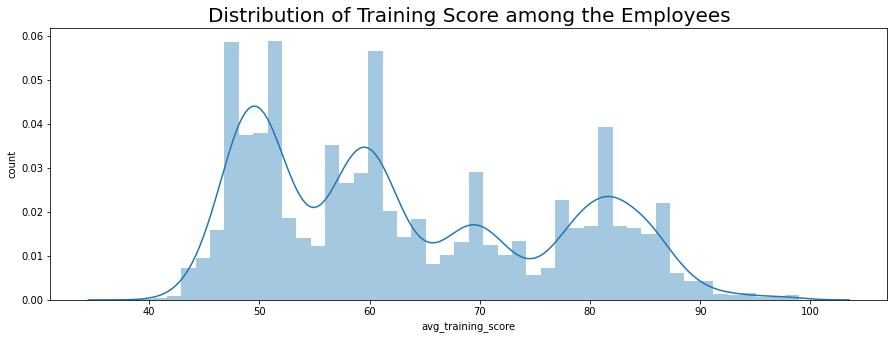

In [30]:
plt.subplots(figsize=(15,5))
sns.distplot(train['avg_training_score'])
plt.title('Distribution of Training Score among the Employees', fontsize = 20)
plt.xlabel('avg_training_score')
plt.ylabel('count')
plt.show()

In [31]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

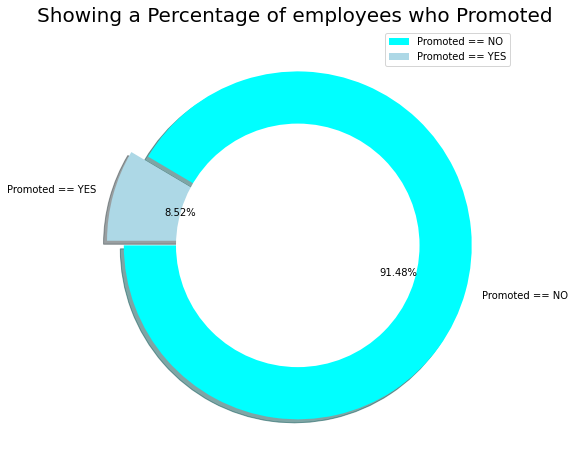

In [32]:
size = [50140, 4668]
labels = "Promoted == NO", "Promoted == YES"
colors = ["cyan", "lightblue"]
explode = [0, 0.1]

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%",startangle=180)
plt.title('Showing a Percentage of employees who Promoted ' , fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

* #  Bivariate Analysis

In [33]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [34]:
a=['department', 'region', 'education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?']

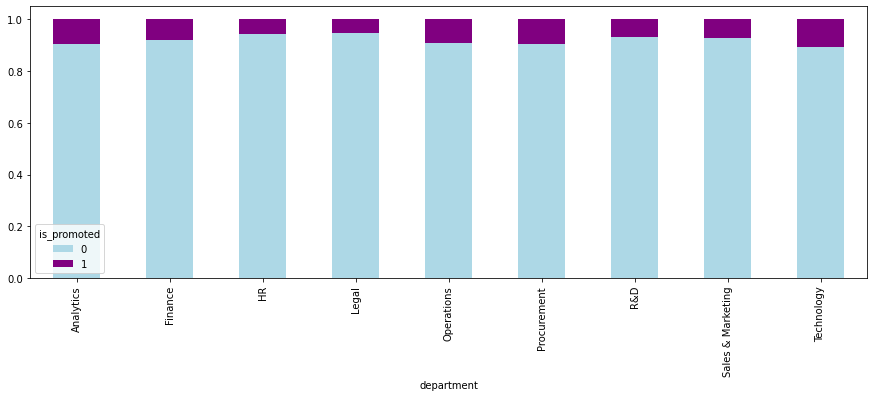

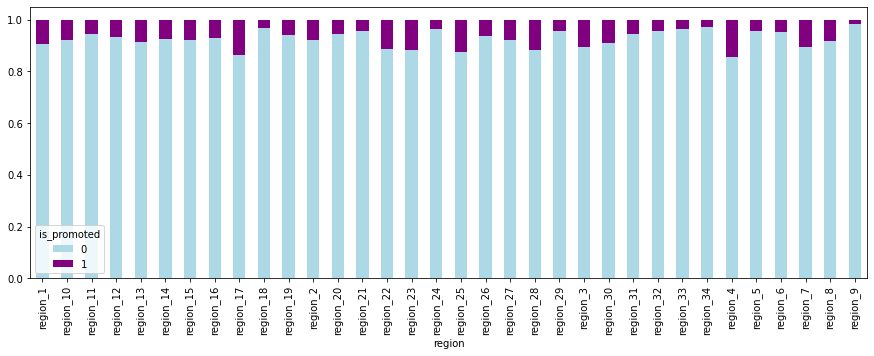

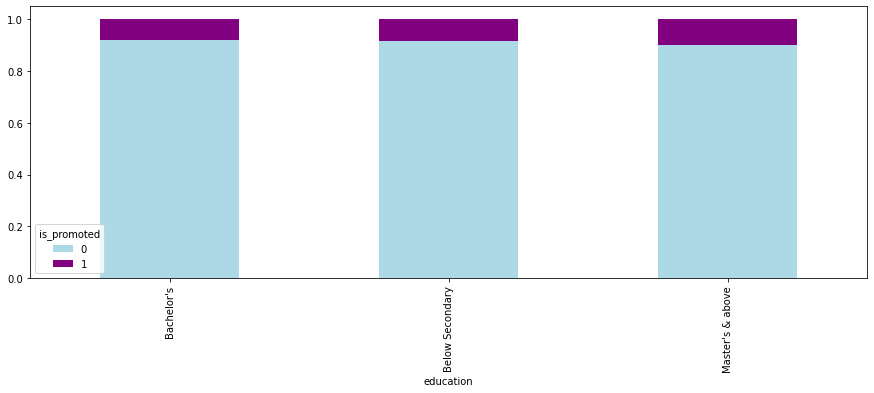

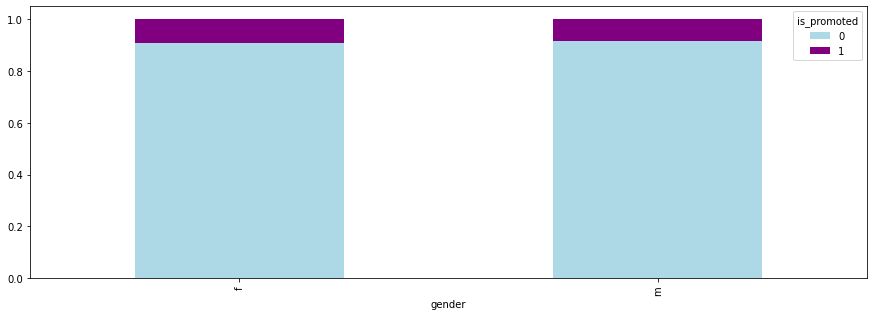

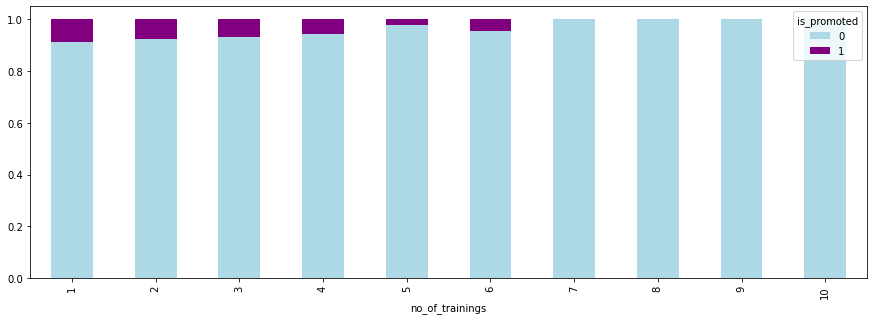

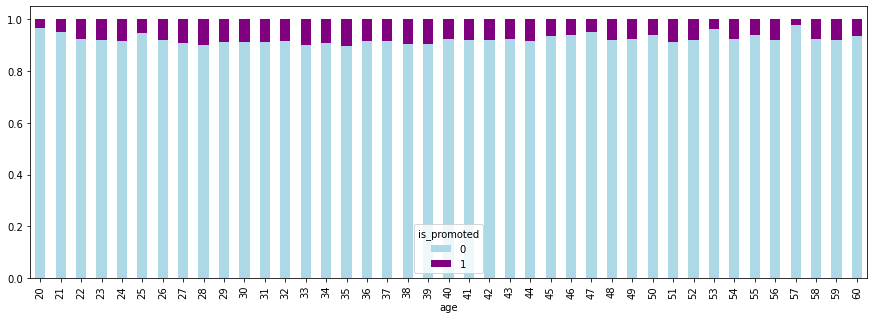

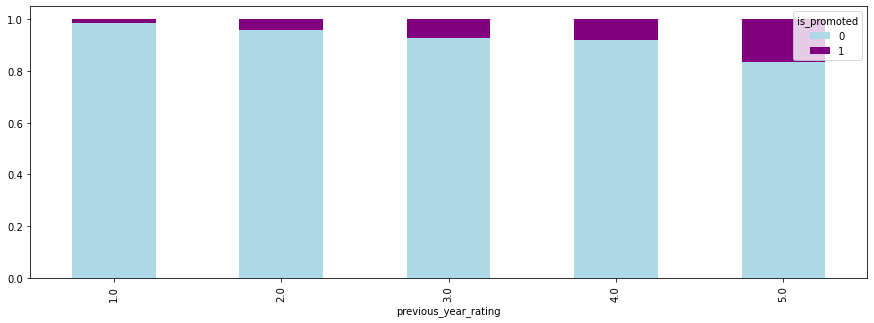

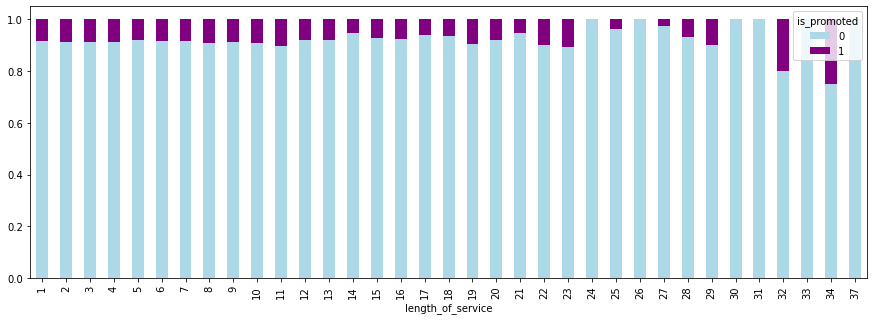

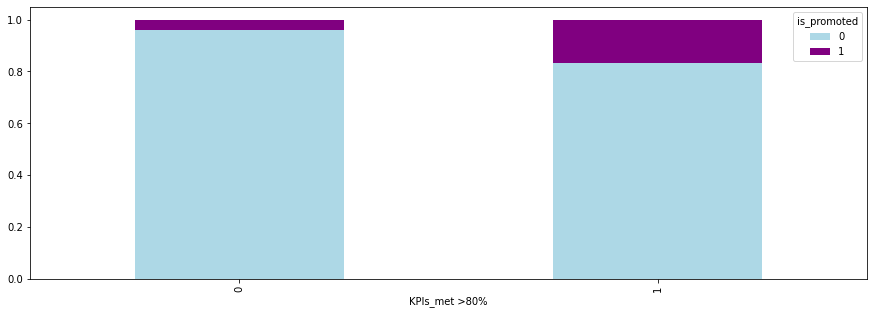

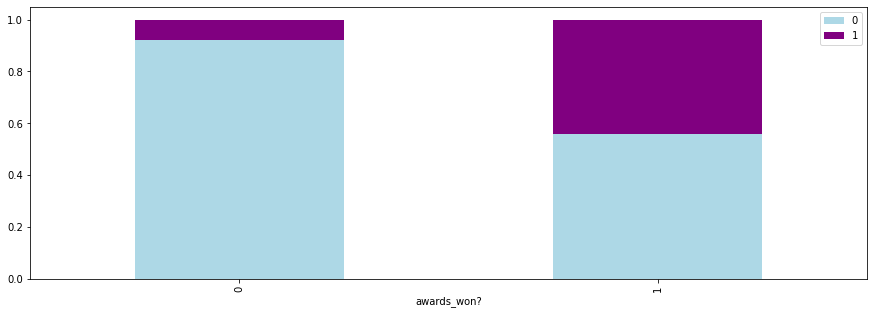

In [35]:
for i in a:
  data = pd.crosstab(train[i],train['is_promoted'])
  data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'purple'])

plt.legend()
plt.show()

* # Multivariate Analysis

In [36]:
#sns.swarmplot(x = "length_of_service", y = "KPIs_met >80%", hue = "is_promoted",  data = train) 

# 3.check duplicate row in train data if present

In [37]:
def remove_duplicate(data):
  print("BEFOR REMOVING DUPLICATES - No of Row = " ,data.shape[0])
  data.drop_duplicates(keep='first',inplace=True)
  print("AFTER REMOVING DUPLICATES - No of Row = " ,data.shape[0])

  return 'checked Duplicates'

remove_duplicate(train) 

BEFOR REMOVING DUPLICATES - No of Row =  54808
AFTER REMOVING DUPLICATES - No of Row =  54808


'checked Duplicates'

# 4.Check & Fill Missing value:

* Continuous: Mean/Meadian/Mode/Zero(specific value)
 
* Categorical: backfill/forward/other

In [38]:
#Check the missing values in train data
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

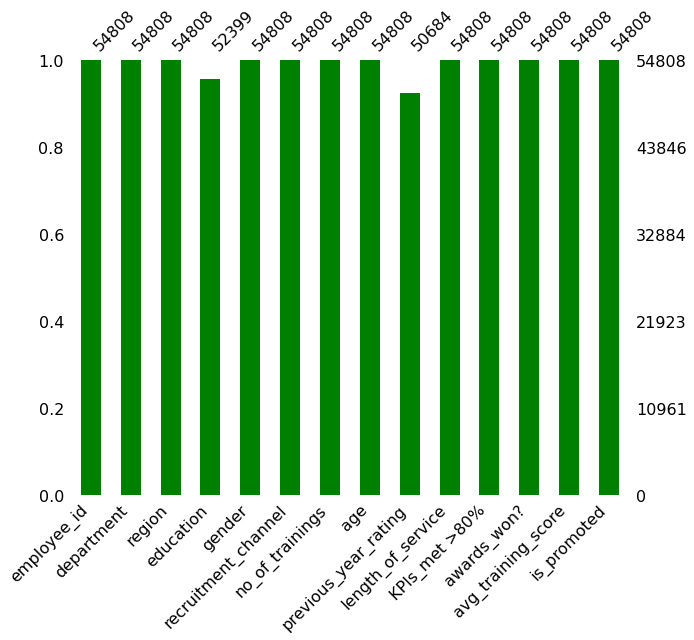

In [39]:
#display of missing values in Train data
msno.bar(train, color = 'green', figsize = (10,8)) 

In [40]:
#Check the missing values in test data
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

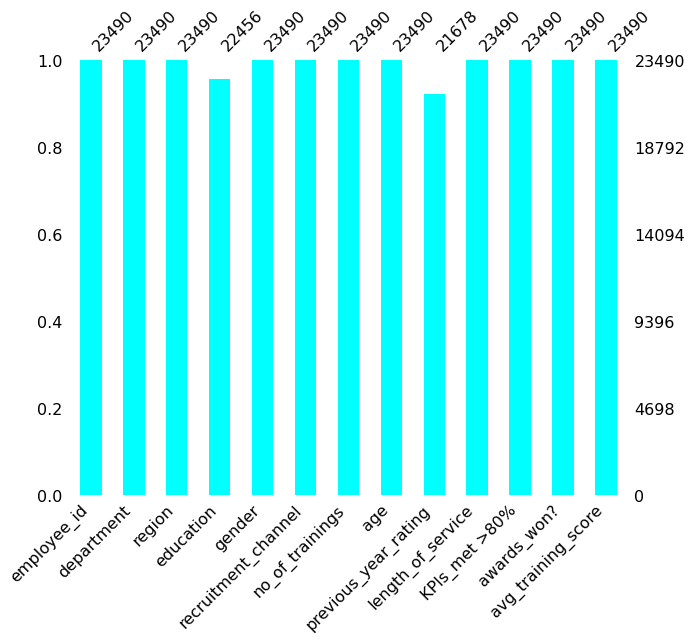

In [41]:
#display of missing values in Test data
msno.bar(test, color = 'cyan', figsize = (10,8))  

Missing values are present in "education" & "previous_year_rating " columns in both Train & Test data.

Let's Handle it based on intution.

Why missing data in 'previous_year_rating' cloumn?

data was no entered because these employees were Fresher.(lenght of service=1)
No datawould have been there in the datasource itself. Logically we are imputing with "0" as Fresher.

# impute missing value

In [42]:
train['previous_year_rating']=train['previous_year_rating'].fillna(0)
test['previous_year_rating']=test['previous_year_rating'].fillna(0)

In [43]:
print (train['length_of_service'].head())
print(train['previous_year_rating'].head())

0     8
1     4
2     7
3    10
4     2
Name: length_of_service, dtype: int64
0    5.0
1    5.0
2    3.0
3    1.0
4    3.0
Name: previous_year_rating, dtype: float64


In [44]:
train['Fresher']=train['previous_year_rating'].apply(lambda x: 'Fresher' if x==0 else 'Experienced')

In [45]:
train[['previous_year_rating','length_of_service','Fresher']][train['Fresher']=='Fresher']

,previous_year_rating,length_of_service,Fresher
10,0.0,1,Fresher
23,0.0,1,Fresher
29,0.0,1,Fresher
56,0.0,1,Fresher
58,0.0,1,Fresher
...,...,...,...
54703,0.0,1,Fresher
54734,0.0,1,Fresher
54746,0.0,1,Fresher
54773,0.0,1,Fresher


In [46]:
train[['previous_year_rating','length_of_service','Fresher']].head(15)

,previous_year_rating,length_of_service,Fresher
0,5.0,8,Experienced
1,5.0,4,Experienced
2,3.0,7,Experienced
3,1.0,10,Experienced
4,3.0,2,Experienced
5,3.0,7,Experienced
6,3.0,5,Experienced
7,3.0,6,Experienced
8,4.0,5,Experienced
9,5.0,5,Experienced


Impute Missing data in 'Education' cloumn

we assume that wile collecting data Relevant menbers data were collected closed to one another.

1.ffill -> forward fill that fills Missing values with Previous Row value if Previous Row value is NAN, moves to the next element without imputing any value.

2.bfill -> backword fill thaat fills Missing values with Next Row value Next Row value is NAN, moves to the next element without imputing any any value.

In [47]:
train['education']=train['education'].ffill(axis=0)
train['education']=train['education'].bfill(axis=0)

test['education']=test['education'].ffill(axis=0)
test['education']=test['education'].bfill(axis=0)

In [48]:
display("Null value in Train data:",train.isna().sum())
display("Null value in Test data:",test.isna().sum())

'Null value in Train data:'

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
Fresher                 0
dtype: int64

'Null value in Test data:'

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

# 5. Drop unneccessary columns in both Train & test data

In [49]:
train=train.drop(['employee_id'],axis=1)
test=test.drop(['employee_id'],axis=1)

# 6.split dataset into Predictors(independent) & Target(dependent)

In [50]:
xtrain=train[['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']]
ytrain=train['is_promoted']
xtest=test

 # 7. Data Encoding : Label Encoding, Onehot encoding

In [51]:
def data_encode(endcode_strategy,encode_col,encode_data):
    if endcode_strategy=='Label_Encoding':
        print('Label_Encoding')
        Encoder==Labelencoder()
        for col in encode_col:
            print("columns",col)
            encode_data(col)==Encoder.fit_transform(tuple(encode_data[col]))
    elif endcode_strategy=='Onehot_Encoding':
        print('Onehot_Encoding')
        encode_data=pd.get_dummies(encode_data)  
        
    dtype_list=['float64','float32','int64','int32']
    encode_data.astype(dtype_list[0]).dtypes
    
    return encode_data

In [52]:
encode_col=['department','region', 'education', 'gender', 'recruitment_channel','age']
endcode_strategy=['Label_Encoding','Onehot_Encoding']

xtrain_encode=data_encode(endcode_strategy[1],encode_col,xtrain)
xtest_encode=data_encode(endcode_strategy[1],encode_col,xtest)

Onehot_Encoding
Onehot_Encoding


In [53]:
xtrain=xtrain_encode
xtrain.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [54]:
xtest=xtest_encode
display(xtest_encode.head())

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,0.0,1,1,0,77,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,1,31,3.0,5,0,0,51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
2,1,31,1.0,4,0,0,47,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,1,30,4.0,7,0,0,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


# **8. Model Building**

In [55]:
#Linear Regression 
lin=LinearRegression()
lin.fit(xtrain,ytrain)

ypred=lin.predict(xtest)

print("Training Accuracy :", lin.score(xtrain, ytrain))

Training Accuracy : 0.23443308004714836


In [57]:
#LogisticRegression
log = LogisticRegression(random_state=30)
log.fit(xtrain,ytrain)

ypred=log.predict(xtest)

print("Training Accuracy :", log.score(xtrain, ytrain))

Training Accuracy : 0.9210699168004671


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain)

ypred = knn.predict(xtest)

print("Training Accuracy :", knn.score(xtrain, ytrain))

Training Accuracy : 0.9402277039848197


In [59]:
#Decision tree
dtc = DecisionTreeClassifier(max_depth = 5,random_state=25)
dtc.fit(xtrain, ytrain)

ypred = dtc.predict(xtest)
print("Training Accuracy :", dtc.score(xtrain, ytrain))

Training Accuracy : 0.9265983068165231


In [60]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

ypred = gnb.predict(xtest)

print("Training Accuracy :", gnb.score(xtrain, ytrain))

Training Accuracy : 0.5461976353816961


In [61]:
#Light Gradient Boosting Classifier

lgb = LGBMClassifier()
lgb.fit(xtrain, ytrain)

ypred = lgb.predict(xtest)

print("Training Accuracy :", lgb.score(xtrain, ytrain))

Training Accuracy : 0.944770836374252


**Thank you for Reading!!
    Please don't forget to appreciate me with an Upvote.****
